![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000


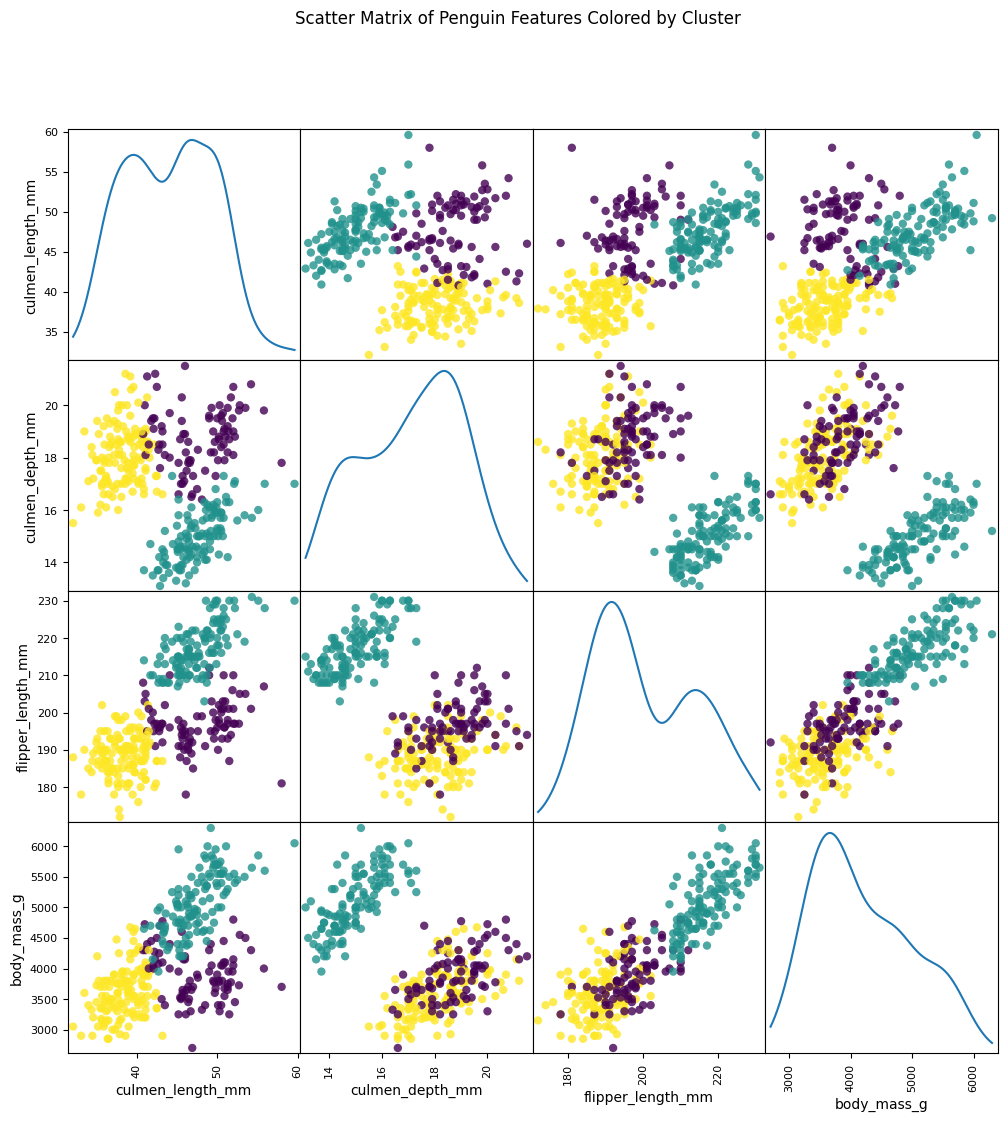

In [12]:
# Import Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df['sex'] = penguins_df['sex'].map({'MALE': 1, 'FEMALE': 0})
features = penguins_df.drop('sex', axis=1)
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
model = pipeline.fit(features)
penguins_df['cluster'] = model.predict(features)
stat_penguins = penguins_df.drop('sex', axis=1).groupby('cluster').mean()
print(stat_penguins)

# Create a visualization to show penguin characteristics by cluster
pd.plotting.scatter_matrix(
    penguins_df.drop(['cluster', 'sex'], axis=1),
    figsize=(12, 12),
    c=penguins_df['cluster'],
    cmap='viridis',
    marker='o',
    alpha=0.8,
    diagonal='kde'
)
plt.suptitle('Scatter Matrix of Penguin Features Colored by Cluster')
plt.show()

![Clusterized_penguis][]